# Introduction

--Question--
What is sentiment Analysis and why it is important for any business?

#### Customer Sentiment analysis is the process of analyzing customer's feedback and opinions to understand their feelings towards a brand, product or service. 

It is important for any business because it can help to predict customer's churning rate.
Help to gain insights about company's products and efficiently take actions.

Source of Dataset-https://www.kaggle.com/code/soniaahlawat/sentiment-analysis-amazon-review/comments

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np

import spacy 
import re

#Data Visualization
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.gridspec as gridspec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Read data 

In [2]:
amazon_reviews=pd.read_csv('/Users/shikhagautam/Documents/IOD/archive/Musical_instruments_reviews.csv')

In [3]:
amazon_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
amazon_reviews.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [5]:
amazon_reviews.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [6]:
amazon_reviews.shape

(10261, 9)

### About this dataset:-This dataset has 10261 rows and 9 columns.

1-reviewerID - ID of the reviewer,--like A2SUAM1J3GNN3B

2-asin - ID of the product, --e.g. B00JBIVXGC

3-reviewerName - name of the reviewer

4-helpful - helpfulness rating of the review, e.g. 2/3

5-reviewText - text of the review

6-overall - rating of the product

7-summary - summary of the review

8-unixReviewTime - time of the review (unix time)

9-reviewTime - time and year of the review 

In [7]:
# Checking null values
amazon_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

### Null value 
As we can see here that reviewerName & reviewText has some null values. As we know from the data that 
reviewerName does not add much value to our anaylsis so we are going to drop that column. 

Moreover, reviewtext has only 7 missing values so we can drop those 7 rows. 

In [8]:
# Dropping columns and rows
amazon_reviews['reviewText']= amazon_reviews['reviewText'].fillna('Missing')

In [9]:
df = amazon_reviews.drop(columns=['reviewerName'])
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### Overall Rating Sentiment Decision-

1- If the text score is less than or equal to 2 then it's - Negative

2- If the text score is equal to 3 then it's - Neutral

3- If the text score is more than 3 then it's - positive

Now in our dataset we can see that how many of positve, negative and neutral scores we have in total:

In [10]:
df['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

As from the above text we can see that we have highest number of 5 rating text followed by 4 and so on.

###  Add Sentiment Column in our dataset for Ananlysis

In [11]:
def sentiment(sentiment):
    if sentiment<=2: 
        value='Negative'
    elif sentiment>3:
          value='Positive'
    else:
          value='Neutral'
    return value

df['Sentiment'] = df['overall'].apply(sentiment)
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive


In [12]:
df['Sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

In [13]:
df_sentiment=df.groupby('Sentiment')['Sentiment'].count().reset_index(name='counts')

In [14]:
df_sentiment['count_percent'] = (df_sentiment['counts'] / 
                      df_sentiment['counts'].sum()) * 100

In [15]:
df_sentiment.round(2)

,Sentiment,counts,count_percent
0,Negative,467,4.55
1,Neutral,772,7.52
2,Positive,9022,87.93


Now it's more clear that how many we have 88% of positive ratings followed by 7.5% of neutral and then negative.

### Removing Stopwords 

In [16]:
nlp = spacy.load("en_core_web_md")    

In [17]:
df['reviewText_lema'] = df.reviewText.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))

In [18]:
df['reviewText_lema']

0        write , exactly suppose . filter pop sound . r...
1        product exactly affordable . realize double sc...
2        primary job device block breath produce pop so...
3        nice windscreen protect MXL mic prevent pop . ...
4        pop filter great . look perform like studio fi...
                               ...                        
10256                           great , expect .   thank .
10257    think try Nanoweb string , bit high price ( co...
10258    try coated string past ( include Elixirs ) fon...
10259    , Elixir DEVELOPED Taylor Guitars ... string d...
10260    string good , perfect .   unwound string brigh...
Name: reviewText_lema, Length: 10261, dtype: object

### Feature Engineering 

As we have reviewTime column in which we have date, month and year. 
So from that we are going to extract year and month and make a new columns from that.
We can also make year and month in one separate column for analysis like in which year and month which we got good ratings.

In [19]:
df['year'] = pd.DatetimeIndex(df['reviewTime']).year
df['month'] = pd.DatetimeIndex(df['reviewTime']).month
df['yyyy-mm'] = pd.to_datetime(df['reviewTime']).dt.strftime('%Y-%m')

In [22]:
df_year=df.groupby(['year','Sentiment'])['year'].count().reset_index(name='counts')
df_year['count_percent'] = (df_year['counts'] / 
                      df_year.groupby('year')['counts'].transform('sum')) * 100
df_year[df_year['Sentiment']=='Negative']

,year,Sentiment,counts,count_percent
2,2006,Negative,1,10.000000
5,2007,Negative,1,4.545455
7,2008,Negative,2,3.174603
10,2009,Negative,5,3.906250
13,2010,Negative,16,4.571429
16,2011,Negative,46,4.568024
19,2012,Negative,85,4.390496
22,2013,Negative,170,4.192355
25,2014,Negative,141,5.263158


In [24]:
df_year=df.groupby(['year','Sentiment'])['year'].count().reset_index(name='counts')
df_year['count_percent'] = (df_year['counts'] / 
                      df_year.groupby('year')['counts'].transform('sum')) * 100
df_year[df_year['Sentiment']=='Positive']

,year,Sentiment,counts,count_percent
0,2004,Positive,7,100.000000
1,2005,Positive,4,100.000000
4,2006,Positive,8,80.000000
6,2007,Positive,21,95.454545
9,2008,Positive,54,85.714286
12,2009,Positive,115,89.843750
15,2010,Positive,314,89.714286
18,2011,Positive,877,87.090367
21,2012,Positive,1721,88.894628
24,2013,Positive,3566,87.940814


## Some Insights-
So, here if we see in negative table we can take into account that from year 2013 to 2014, 25.54% negative 
comments increased which might be a big loss to any company like Amazon.

On the other hand, in 2012 amazon received 89% positive comments. But in 2013 positive review dropped by 1%. 

In [25]:
df_yymm=df.groupby(['year','month','Sentiment'])['year'].count().reset_index(name='counts')
df_yymm['count_percent'] = (df_yymm['counts'] / 
                      df_yymm.groupby(['year','month'])['counts'].transform('sum')) * 100
df_yymm[df_yymm['Sentiment']=='Negative']

,year,month,Sentiment,counts,count_percent
8,2006,3,Negative,1,100.000000
18,2007,9,Negative,1,50.000000
30,2008,6,Negative,1,50.000000
36,2008,11,Negative,1,10.000000
53,2009,9,Negative,3,16.666667
56,2009,11,Negative,1,6.666667
58,2009,12,Negative,1,5.882353
62,2010,2,Negative,1,4.347826
66,2010,4,Negative,2,8.000000
71,2010,6,Negative,2,13.333333


In [26]:
df_yymm=df.groupby(['year','month','Sentiment'])['year'].count().reset_index(name='counts')
df_yymm['count_percent'] = (df_yymm['counts'] / 
                      df_yymm.groupby(['year','month'])['counts'].transform('sum')) * 100
df_yymm[df_yymm['Sentiment']=='Positive']

,year,month,Sentiment,counts,count_percent
0,2004,9,Positive,3,100.000000
1,2004,11,Positive,3,100.000000
2,2004,12,Positive,1,100.000000
3,2005,1,Positive,1,100.000000
4,2005,3,Positive,2,100.000000
...,...,...,...,...,...
205,2014,3,Positive,384,86.292135
208,2014,4,Positive,349,87.909320
211,2014,5,Positive,300,89.020772
214,2014,6,Positive,265,84.935897


### EDA

In [29]:
fig = px.line(df_year[df_year['Sentiment']=='Negative'], x="year", y="count_percent", color='Sentiment',title='Sentiment',markers=True)
fig.show()

In [30]:
fig = px.line(df_year[df_year['Sentiment']=='Positive'], x="year", y="count_percent", color='Sentiment',title='Sentiment',markers=True)
fig.show()

In [31]:
fig = px.line(df_year, x="year", y="counts", color='Sentiment',title='Sentiment',markers=True)
fig.show()

### Worldcloud
#### Making a positive, negative, and neutral word column so then we could make a wordcloud

In [32]:
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,reviewText_lema,year,month,yyyy-mm
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive,"write , exactly suppose . filter pop sound . r...",2014,2,2014-02
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive,product exactly affordable . realize double sc...,2013,3,2013-03
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive,primary job device block breath produce pop so...,2013,8,2013-08
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive,nice windscreen protect MXL mic prevent pop . ...,2014,2,2014-02
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive,pop filter great . look perform like studio fi...,2014,2,2014-02


In [33]:
df_positive=df[df['Sentiment']=='Positive']
df_negative=df[df['Sentiment']=='Negative']
df_neutral=df[df['Sentiment']=='Neutral']

In [34]:
text = "".join(review for review in df_positive['reviewText_lema'])

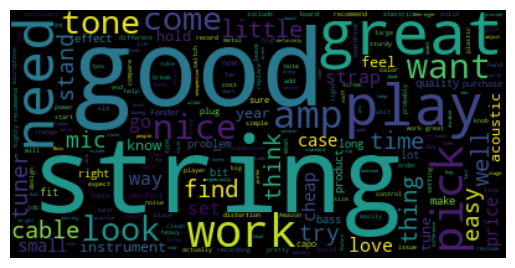

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["guitar","pedal","buy","sound","use"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

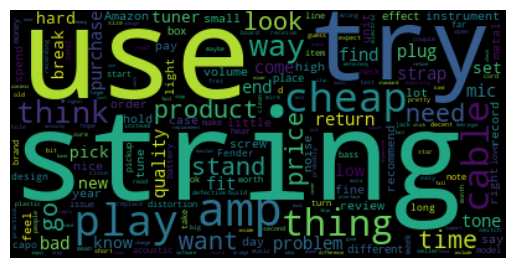

In [36]:
text = "".join(review for review in df_negative['reviewText_lema'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["guitar","sound","buy","great","well","good","work","pedal"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

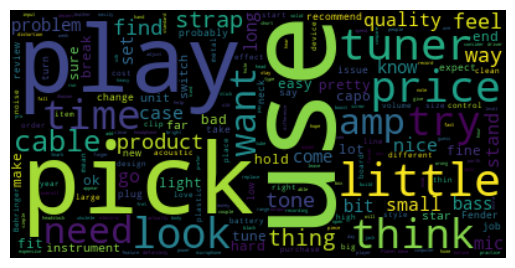

In [37]:
text = "".join(review for review in df_neutral['reviewText_lema'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["guitar","sound","buy","great","well","good","work","pedal","cheap","string"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Insights

1-Positive 

Frequent words used work,string, good.
One more thing to observe here "cheap" word which we could said that people who commented positive might think that prices are cheap in amazon and that is why they liked the product.

2- Negative

Frequent words are- cheap,play,thing,string, try,use.

3- Neutral

Frequent words are- pick,use,play,little,need, tuner.

### Modelling

In [38]:
df.drop(df[df['Sentiment'] == 'Neutral'].index, inplace = True)

In [39]:
df.shape

(9489, 13)

In [40]:
df['Sentiment_text']=df['Sentiment']
df=df.replace({'Sentiment': {'Positive': 1, 'Negative': 0}})

In [41]:
df = df.rename(columns={'Sentiment': 'is_positive'})


In [42]:
# Features and Labels
X = df['reviewText_lema']
y = df['is_positive']

In [43]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Use Bag-of-Words

In [44]:
# create a matrix of word counts from the text
counts = CountVectorizer()

## 1. Logistic Regression

In [45]:
X_train_vector= counts.fit_transform(X_train)
X_test_vector = counts.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_vector, y_train)

y_pred_lr = model.predict(X_test_vector)
accuracy_score(y_test, y_pred_lr)

0.9483667017913593

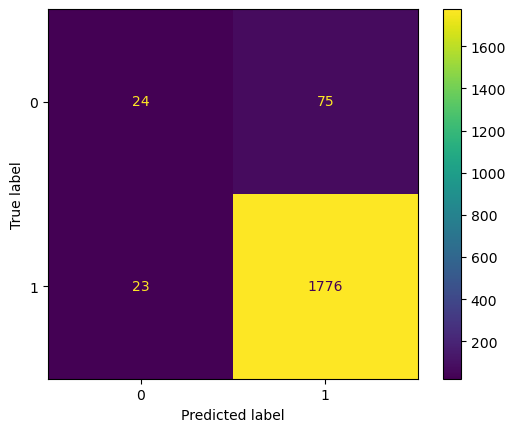

In [46]:
cm = confusion_matrix(y_test, y_pred_lr, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [47]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.51      0.24      0.33        99
           1       0.96      0.99      0.97      1799

    accuracy                           0.95      1898
   macro avg       0.74      0.61      0.65      1898
weighted avg       0.94      0.95      0.94      1898



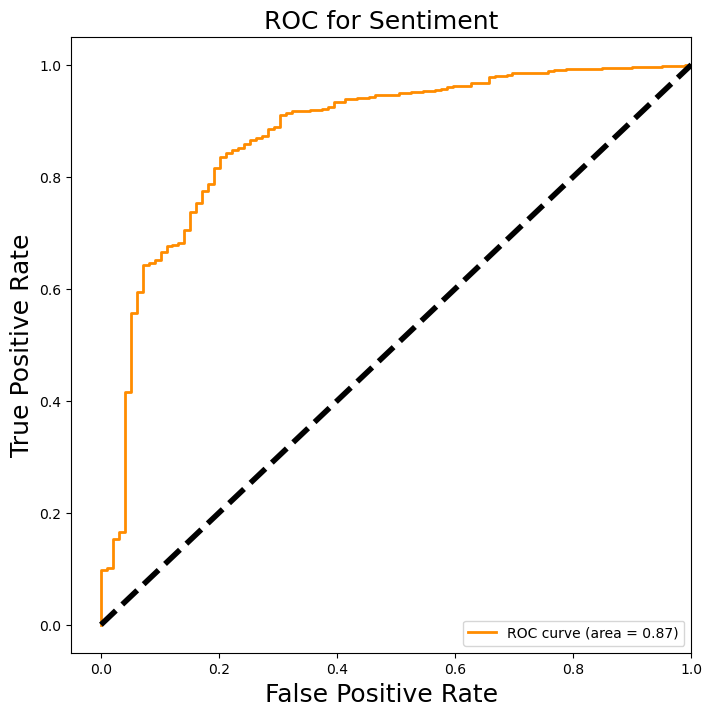

In [48]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds = model.predict_proba(X_test_vector)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (where sentiment is_positive)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Sentiment', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 2. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt_classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
dt_classifier.fit(X_train_vector, y_train)
#Predict the response for test dataset
y_pred_dt = dt_classifier.predict(X_test_vector)
accuracy_score(y_test, y_pred_dt)

0.9230769230769231

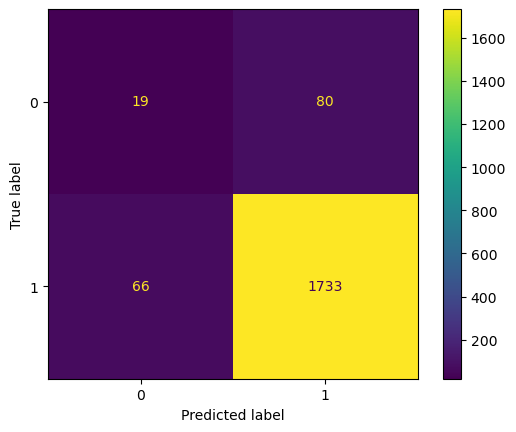

In [50]:
cm = confusion_matrix(y_test, y_pred_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [51]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.22      0.19      0.21        99
           1       0.96      0.96      0.96      1799

    accuracy                           0.92      1898
   macro avg       0.59      0.58      0.58      1898
weighted avg       0.92      0.92      0.92      1898



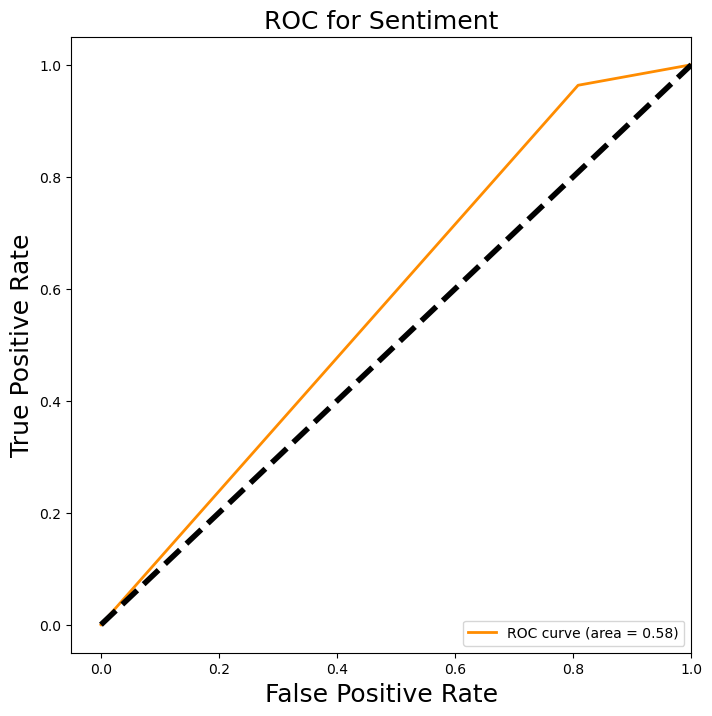

In [52]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds = dt_classifier.predict_proba(X_test_vector)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (where sentiment is_positive)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Sentiment', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 3.Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [54]:
naive_bayes.fit(X_train_vector, y_train)
y_pred_nb=naive_bayes.predict(X_test_vector)
accuracy_score(y_test,y_pred_nb)

0.9483667017913593

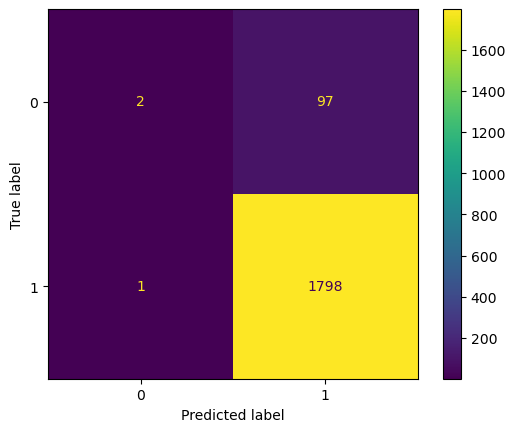

In [55]:
cm = confusion_matrix(y_test, y_pred_nb, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

In [56]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.67      0.02      0.04        99
           1       0.95      1.00      0.97      1799

    accuracy                           0.95      1898
   macro avg       0.81      0.51      0.51      1898
weighted avg       0.93      0.95      0.92      1898



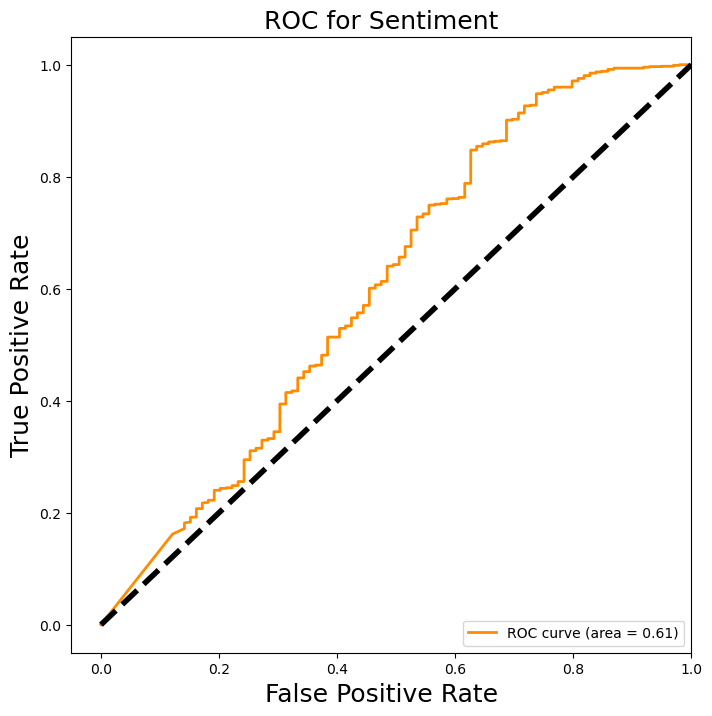

In [57]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds =naive_bayes.predict_proba(X_test_vector)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (where sentiment is_positive)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Sentiment', fontsize=18)
plt.legend(loc="lower right")
plt.show()

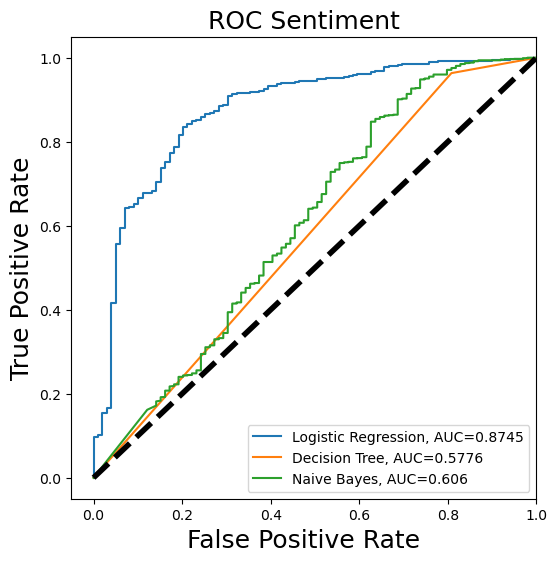

In [61]:
from sklearn import metrics

plt.figure(figsize=[6,6])

y_pred_lr =model.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


y_pred_dt = dt_classifier.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dt )
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

y_pred_nb =naive_bayes.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Sentiment', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Conclusion

From the  above graph we can concluded that Logistic regression performs better than Decision Tree 
and Naive Bayes. Even though, logistic regression performed well with 95% of accuracy score we can say that 
it had lower performance on predicting class 0 (negative sentiment) with lower precision and recall.